<h1>IVDA Group 10 - IKEAlytics</h1>

<h2>Group Assignment 2 - Coding Response</h2>

- Noah Croes 24-738-759
- Leon Keutzer 24-736-001
- Jasur Fayzullaev 23-748-973
- Michael Sigg 18-618-843
  
---

- Link to Github: [IVDA_G10](https://github.com/noah18c/IVDA_G10)
- Link to Data Source: [Kaggle](https://www.kaggle.com/datasets/ahmedkallam/ikea-sa-furniture-web-scraping/data)

---

### 1. Team Contributions:
Noah led the modeling work, including hierarchical clustering and implementing the KNN approach. Leon focused on data wrangling and the backend implementation of the tool. Jasur is mainly responsible for the frontend development. Michael contributed the data characterization part and focused on the written tasks, as well as the video response. 

### 2. Task List:
1. **Accept User Input**: Let users mark items they like to receive recommendations for them
2. **Generate Recommendations**: A KNN model identifies and recommends similar products
3. **Display Recommendations**: Display the recommendations
4. **Explain Recommendations**: When user selects a specific recommendation, display reasoning for it using charts and text explanations

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data
data_path = "IKEA_SA_Furniture_Web_Scrapings_sss.csv"
df = pd.read_csv(data_path, index_col=0)

### 3. Data Characterization 

#### 3.1 Data Types and Distributions

In [3]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


In [4]:
df.describe()

,item_id,price,depth,height,width
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


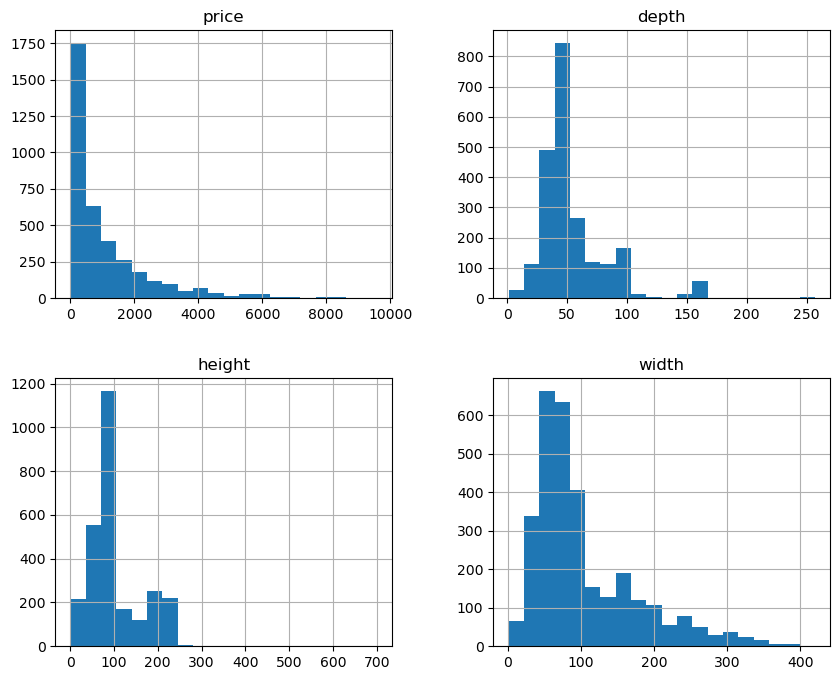

In [5]:
# Histograms for numerical attributes
df[['price', 'old_price', 'depth', 'height', 'width']].hist(bins=20, figsize=(10, 8))
plt.show()

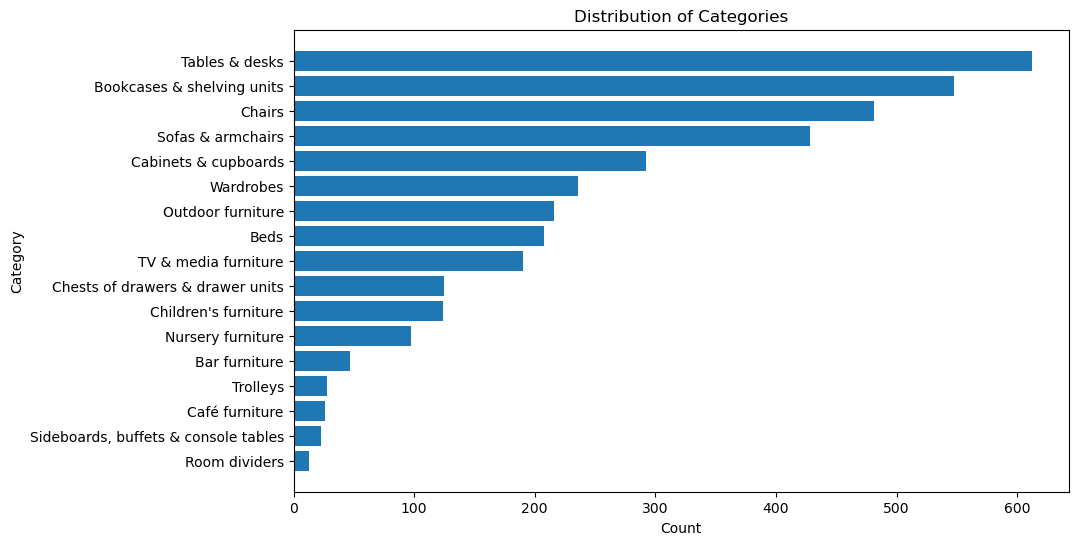

In [6]:
category_counts = df['category'].value_counts()

# Plot horizontal bar chart for category distribution
plt.figure(figsize=(10, 6))
plt.barh(category_counts.index, category_counts.values)
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Distribution of Categories")
plt.gca().invert_yaxis()
plt.show()

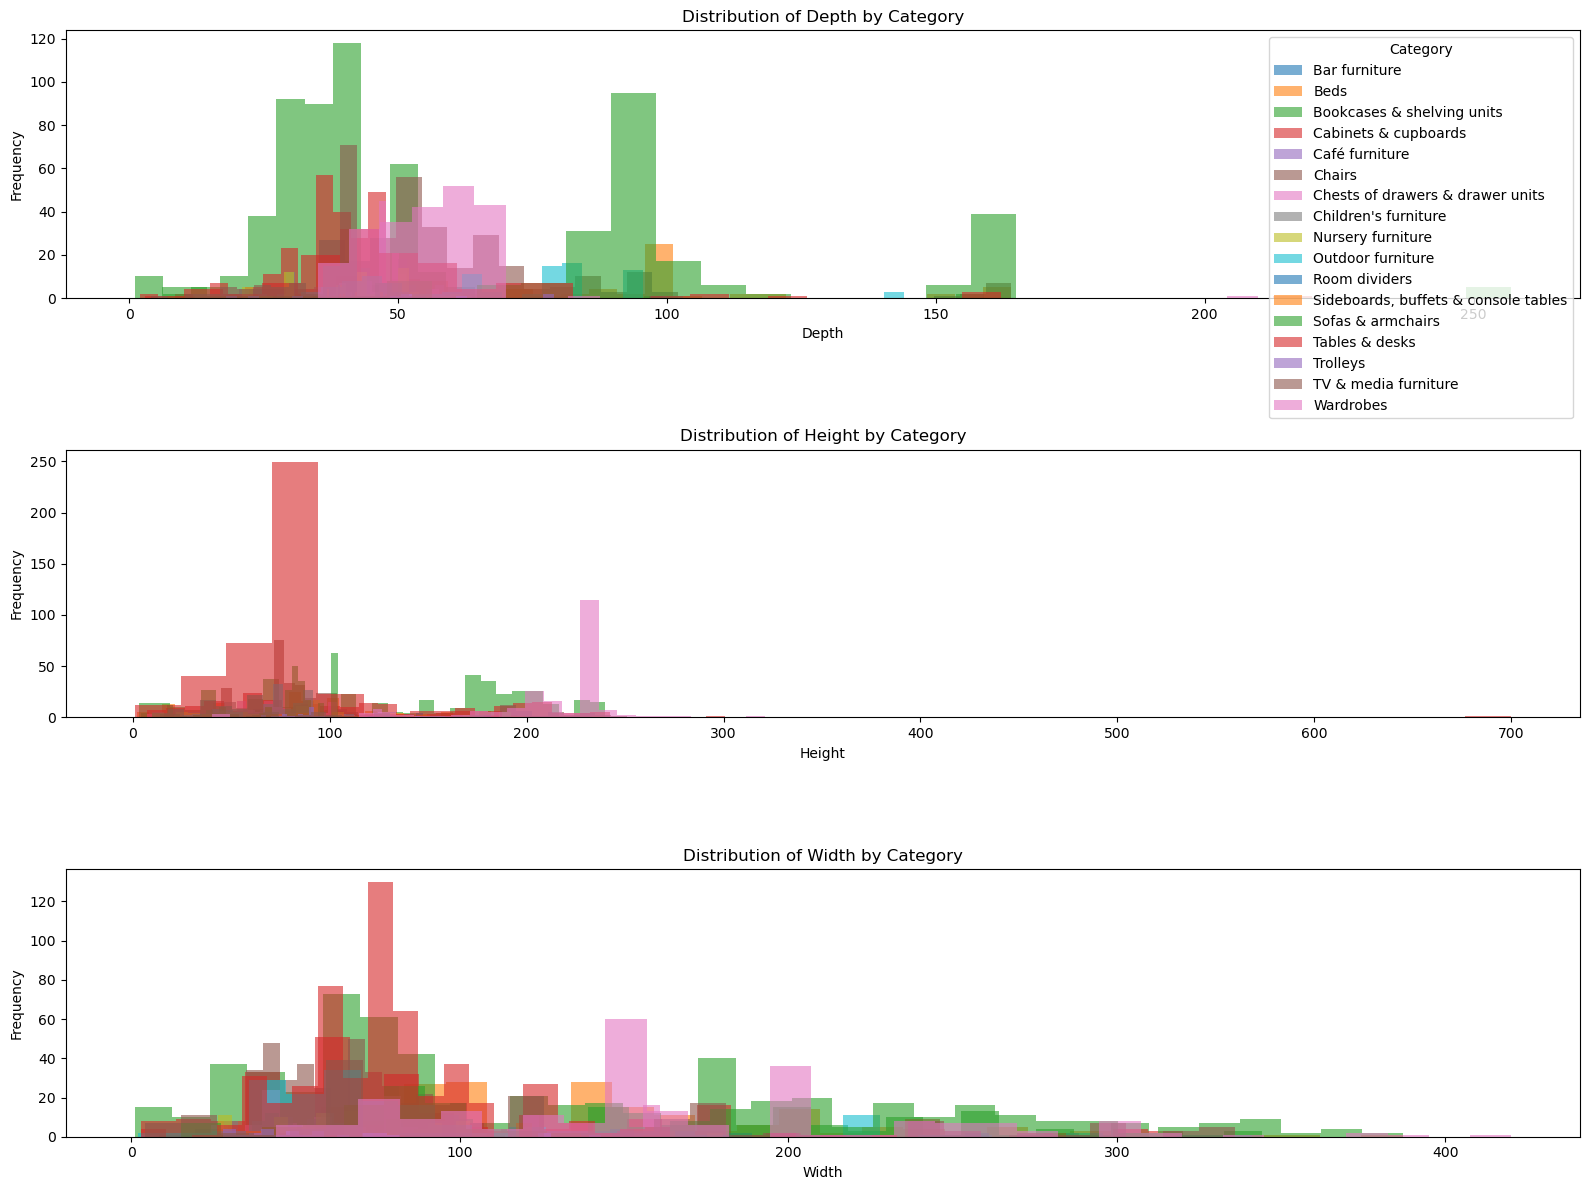

In [7]:
# Define the dimensions to plot
dimensions = ['depth', 'height', 'width']

# Set figure size and layout
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=False)

# Loop over dimensions and plot a stacked histogram for each
for i, dim in enumerate(dimensions):
    # Filter out NaN values for the current dimension
    data = df[['category', dim]].dropna()

    # Get unique categories
    categories = data['category'].unique()

    # Plot histograms for each category in a stacked manner
    for category in categories:
        category_data = data[data['category'] == category][dim]
        axes[i].hist(category_data, bins=30, alpha=0.6, label=category, stacked=True)

    # Set titles and labels
    axes[i].set_title(f'Distribution of {dim.capitalize()} by Category')
    axes[i].set_xlabel(dim.capitalize())
    axes[i].set_ylabel('Frequency')

# Add a legend to the first axis (showing categories)
axes[0].legend(title="Category", loc="upper right")
plt.tight_layout()
plt.show()

#### 3.2 Data Quality

In [8]:
# Amount of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


In [9]:
df_noNaN = df.dropna()
df_noNaN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1899 entries, 3 to 3688
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            1899 non-null   int64  
 1   name               1899 non-null   object 
 2   category           1899 non-null   object 
 3   price              1899 non-null   float64
 4   old_price          1899 non-null   object 
 5   sellable_online    1899 non-null   bool   
 6   link               1899 non-null   object 
 7   other_colors       1899 non-null   object 
 8   short_description  1899 non-null   object 
 9   designer           1899 non-null   object 
 10  depth              1899 non-null   float64
 11  height             1899 non-null   float64
 12  width              1899 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 194.7+ KB


- Dropping all of the NaNs leads to a significant reduction in the number of observations
- Try to impute them later, by using the categorical mean or median, or estimate them using regression

#### Extreme Values / Outliers

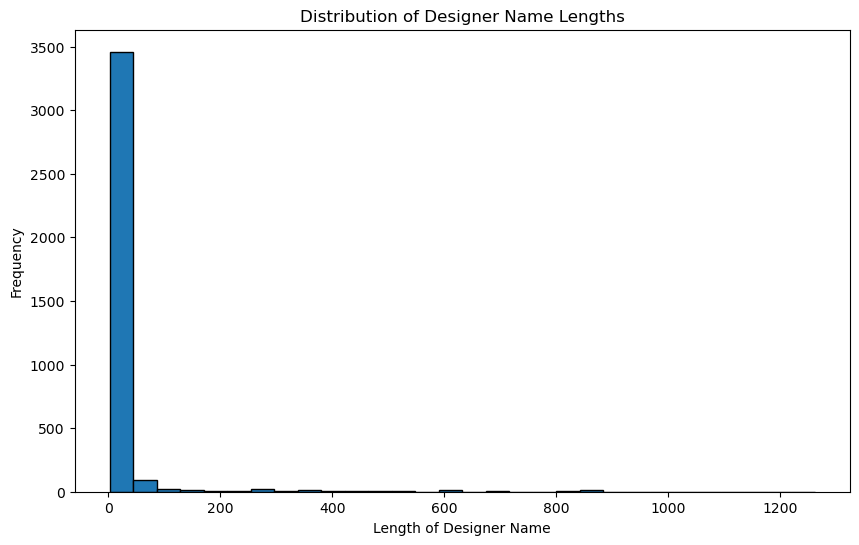

In [10]:
# Calculate the length of each entry in the 'designer' column
designer_lengths = df['designer'].str.len()

# Plot the distribution of designer name lengths
plt.figure(figsize=(10, 6))
plt.hist(designer_lengths, bins=30, edgecolor='black')
plt.xlabel("Length of Designer Name")
plt.ylabel("Frequency")
plt.title("Distribution of Designer Name Lengths")
plt.show()

In [11]:
# example of designer attribute issue
df[(df['designer'].str.len() > 1200)]['designer']

2206    104.246.21 KNOPPARP sofa is very durable thank...
Name: designer, dtype: object

- Key issue with designer attribute: Some contain descriptions of the items and not just designer names
- Manual inspect shows that the longest actual designer has a length of < 65 (multiple designers) and also that there don't seem to be any descriptions with a length shorter than 65. So 65 is a good threshold

In [12]:
df[(df['designer'].str.len() > 60) & (df['designer'].str.len() < 65)]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2516,9277782,VALLENTUNA,Sofas & armchairs,4448.0,"SR 5,560",True,https://www.ikea.com/sa/en/p/vallentuna-3-seat...,Yes,3-seat modular sofa with sofa-bed,IKEA of Sweden/Fredriksson/L Löwenhielm/Hillan...,NaN,84.0,266.0


In [13]:
# drop the rows with descriptions instead of designers
df = df[(df['designer'].str.len() < 65)] 

In [14]:
category_counts = df['designer'].value_counts()
category_counts

designer
IKEA of Sweden                                        828
Ehlén Johansson                                       161
Francis Cayouette                                     151
Ola Wihlborg                                          134
K Hagberg/M Hagberg                                   122
                                                     ... 
Henrik Preutz/Olle Lundberg                             1
IKEA of Sweden/Nike Karlsson/Eva Lilja Löwenhielm       1
Nike Karlsson/IKEA of Sweden/Eva Lilja Löwenhielm       1
Nike Karlsson/IKEA of Sweden                            1
IKEA of Sweden/Ehlén Johansson/Andreas Fredriksson      1
Name: count, Length: 281, dtype: int64

In [15]:
# Inspect the height outliers
df[df['height']>300]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
856,79291355,PLATSA,Cabinets & cupboards,1268.0,"SR 1,505",True,https://www.ikea.com/sa/en/p/platsa-storage-co...,No,"Storage combination, 80x42x30...",IKEA of Sweden,42.0,301.0,80.0
2884,80278273,HILVER,Tables & desks,100.0,No old price,True,https://www.ikea.com/sa/en/p/hilver-leg-cone-s...,No,"Leg cone-shaped, 70 cm",Chenyi Ke,NaN,700.0,NaN
3667,19305534,PLATSA,Wardrobes,1785.5,"SR 2,235",True,https://www.ikea.com/sa/en/p/platsa-wardrobe-w...,No,"Wardrobe with 5 doors+3 drawers, ...",Ola Wihlborg/IKEA of Sweden,42.0,321.0,NaN


In [16]:
# printing the whole description
for desc in df[df['height'] == 301.0]['short_description']:
    print(desc)
for desc in df[df['height'] == 321.0]['short_description']:
    print(desc)

        Storage combination,          80x42x301 cm
        Wardrobe with 5 doors+3 drawers,          175-205x42x321 cm


In [17]:
# cabinet and warderobe seem reasonable
# the table is a mistake, the description states 70cm 
df.loc[df['height'] == 700, 'height'] = 70

In [18]:
# inspect depth outlier 
df[df['depth']>200]
# seems reasonable 

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2283,69254810,GRÖNLID,Sofas & armchairs,6575.0,No old price,True,https://www.ikea.com/sa/en/p/groenlid-u-shaped...,Yes,"U-shaped sofa, 6 seat",Ehlén Johansson/Francis Cayouette,252.0,104.0,327.0
2289,59193723,KIVIK,Sofas & armchairs,8295.0,No old price,True,https://www.ikea.com/sa/en/p/kivik-u-shaped-so...,Yes,"U-shaped sofa, 7-seat",Ola Wihlborg,257.0,83.0,368.0
2385,49252949,KIVIK,Sofas & armchairs,6895.0,No old price,True,https://www.ikea.com/sa/en/p/kivik-u-shaped-so...,Yes,"U-shaped sofa, 6 seat",Ola Wihlborg,257.0,83.0,328.0
2387,69285294,VIMLE,Sofas & armchairs,8395.0,No old price,True,https://www.ikea.com/sa/en/p/vimle-u-shaped-so...,Yes,"U-shaped sofa, 6 seat",Ehlén Johansson,249.0,83.0,327.0
2559,89256610,GRÖNLID,Sofas & armchairs,8900.0,No old price,True,https://www.ikea.com/sa/en/p/groenlid-u-shaped...,No,"U-shaped sofa, 6 seat",Francis Cayouette,252.0,104.0,327.0
3178,19046574,BEKANT,Tables & desks,5300.0,No old price,True,https://www.ikea.com/sa/en/p/bekant-desk-combi...,Yes,"Desk combination, 320x220 cm",K Malmvall/E Lilja Löwenhielm,220.0,NaN,NaN
3484,19300107,PAX,Wardrobes,5380.0,No old price,True,https://www.ikea.com/sa/en/p/pax-wardrobe-whit...,No,"Wardrobe, 276x211x236 cm",IKEA of Sweden/Ehlén Johansson,210.0,236.0,275.0


In [19]:
# check for duplicates 

duplicates = df[df['item_id'].duplicated(keep=False)] 
duplicates = duplicates.sort_values(by='item_id')
duplicates

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
1918,91415,TROFAST,Nursery furniture,5.0,No old price,True,https://www.ikea.com/sa/en/p/trofast-lid-white...,No,"Lid, 20x28 cm",Studio Copenhagen,NaN,NaN,28.0
1834,91415,TROFAST,Children's furniture,5.0,No old price,True,https://www.ikea.com/sa/en/p/trofast-lid-white...,No,"Lid, 20x28 cm",Studio Copenhagen,NaN,NaN,28.0
2560,102065,LYCKSELE LÖVÅS,Sofas & armchairs,495.0,No old price,True,https://www.ikea.com/sa/en/p/lycksele-loevas-m...,No,"Mattress, 140x188 cm",IKEA of Sweden,NaN,NaN,NaN
151,102065,LYCKSELE LÖVÅS,Beds,495.0,No old price,True,https://www.ikea.com/sa/en/p/lycksele-loevas-m...,No,"Mattress, 140x188 cm",IKEA of Sweden,NaN,NaN,NaN
2687,105064,LIATORP,Tables & desks,445.0,No old price,True,https://www.ikea.com/sa/en/p/liatorp-console-t...,No,"Console table, 133x37 cm",Carina Bengs,NaN,75.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,99323614,SMÅGÖRA,Nursery furniture,370.0,No old price,True,https://www.ikea.com/sa/en/p/smagoera-changing...,No,Changing tbl/bookshelf w 1 shlf ut,IKEA of Sweden,40.0,91.0,60.0
29,99323925,STENSELE,Bar furniture,550.0,No old price,True,https://www.ikea.com/sa/en/p/stensele-bar-tabl...,No,"Bar table, 70x70 cm",Maja Ganszyniec,NaN,104.0,70.0
3028,99323925,STENSELE,Tables & desks,550.0,No old price,True,https://www.ikea.com/sa/en/p/stensele-bar-tabl...,No,"Bar table, 70x70 cm",Maja Ganszyniec,NaN,104.0,70.0
2737,99902661,VITTSJÖ,Tables & desks,609.0,No old price,True,https://www.ikea.com/sa/en/p/vittsjoe-shelving...,No,"Shelving unit with laptop table, ...",Johan Kroon,36.0,NaN,202.0


##### Note: How do we deal with duplicates? 
- It seems that duplicated `item_id` values refer to items that belong to multiple categories. A possible approach could be to handle this later during one-hot encoding. After encoding the `category` attribute, we could group by the `item_id` and merge rows, ensuring that each item is marked for all relevant categories.
- This approach could also address the issue of items with multiple designers. First, we would split the `designer` attribute into a list of designers, then use `explode()` to expand the dataset so that each designer has its own row. After one-hot encoding and merging by `item_id`, each item would have a `1` for every designer associated with it
- The question is do we even want to use one-hot encoding. It would increase the feature space a lot (+17 categories and +111 unique designers). If not we'd have to make other decisions on how to handle the duplicate `item_id` and the multi-valued `designer` attributes
- **Decision:** We will use hierarchical clustering to deal with the `designer`, in order to reduce the dimensionality of this feature. `category` will later be mapped to `room`, to reduce the amount of unique values and help with interpretability. The above mentioned approach will be used to get rid of duplicates.

In [20]:
# sample code on how to split up the designer attribute and 'explode' the dataset
test = df.copy()
test['designer'] = test['designer'].str.split('/')
test = test.explode('designer').reset_index(drop=True)

# how to one-hot encode
test_one_hot = pd.get_dummies(test, columns=['category', 'designer'])

# groupy by item_id and merge
test_one_hot_merged = test_one_hot.groupby('item_id').agg('max').reset_index()

#### 3.3 Information on our goals

Based on user selected items, we will use a KNN approach to find and recommend similar items. The recommendations will be visualized with comparisons on attributes like prices and dimensions, helping users quickly identify suitable products.

**Data Preparation Steps:**

1. **Impute Missing Values**: Missing values in `depth`, `width` and `height` will be imputed using regressions. 
2. **Addressing Skewness**: Due to a right-skewed distribution, particularly in prices, we'll apply appropriate transformations, to improve Clustering/ KNN performance.
3. **Encoding Categorical Attributes**: The categorical feature `category` will be mapped to `room` to reduce dimensionality and then encoded to ensure compatibility with KNN.
4. **Clustering**: Apply clustering methods, particularly to the `desginer` feature, to reduce dimensionality. 

### 4. Implementation of data preparation goals

#### 4.1 Visualizing the wrangling process

In [21]:
df_processed = df.copy()

##### 4.1.1 Adding a new feature: "room"

Many of the categories have similarities in terms of the room they are used in, therfore to make better recommendations, I will introduce another column to refer to this and help the model to understand that relation and therefore apply a manual mapping.
<br>
<br>
rooms = ["Living room", "Bedroom", "Office", "Kitchen", "Dining room", "Entrance", "Playroom", "Nursery", "Outdoor"]

In [22]:
# Define the mapping for each category to one or more rooms
category_to_room = {
    'Bar furniture': 'Living room',
    'Beds': 'Bedroom',
    'Bookcases & shelving units': 'Living room, Office',
    'Cabinets & cupboards': 'Living room, Kitchen, Bedroom, Entrance',
    'Café furniture': 'Kitchen, Dining room, Outdoor',
    'Chairs': 'Living room, Kitchen, Dining room, Office',
    'Chests of drawers & drawer units': 'Bedroom, Living room, Entrance',
    "Children's furniture": 'Bedroom, Playroom, Nursery',
    'Nursery furniture': 'Nursery',
    'Outdoor furniture': 'Outdoor',
    'Room dividers': 'Living room, Bedroom, Office',
    'Sideboards, buffets & console tables': 'Living room, Dining room, Entrance',
    'Sofas & armchairs': 'Living room, Bedroom',
    'Tables & desks': 'Living room, Kitchen, Dining room, Office',
    'Trolleys': 'Kitchen, Dining room, Living room',
    'TV & media furniture': 'Living room, Bedroom',
    'Wardrobes': 'Bedroom, Entrance'
}

# Initialize columns for each room as zero (not assigned)
rooms = ["Living room", "Bedroom", "Office", "Kitchen", "Dining room", "Entrance", "Playroom", "Nursery", "Outdoor"]
for room in rooms:
    df_processed[room] = 0

# Set values to 1 where the category is associated with the room
for category, room_list in category_to_room.items():
    for room in room_list.split(', '):
        df_processed.loc[df_processed['category'] == category, room] = 1

# Optional: check the DataFrame
print(df_processed[['category'] + rooms].head())


        category  Living room  Bedroom  Office  Kitchen  Dining room  \
0  Bar furniture            1        0       0        0            0   
1  Bar furniture            1        0       0        0            0   
2  Bar furniture            1        0       0        0            0   
3  Bar furniture            1        0       0        0            0   
4  Bar furniture            1        0       0        0            0   

   Entrance  Playroom  Nursery  Outdoor  
0         0         0        0        0  
1         0         0        0        0  
2         0         0        0        0  
3         0         0        0        0  
4         0         0        0        0  


##### 4.1.2 Adressing the duplicates

In [23]:
# Identify duplicate item_ids
duplicate_item_ids = df_processed[df_processed['item_id'].duplicated(keep=False)]

# Group by 'item_id' and check for columns with multiple unique values
columns_with_differences = []
for column in df_processed.columns:
    unique_counts = duplicate_item_ids.groupby('item_id')[column].nunique()
    if unique_counts.max() > 1:  # If any item_id has more than one unique value in this column
        columns_with_differences.append(column)

# Print the results
print("Columns with differing values for duplicate entries:", columns_with_differences)


Columns with differing values for duplicate entries: ['category', 'Living room', 'Bedroom', 'Office', 'Kitchen', 'Dining room', 'Entrance', 'Playroom', 'Nursery', 'Outdoor']


In [24]:
df_processed["category"].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

The duplicates result from different entrys for the category columns. Therefore we add One Hot Ecncoding to that column, aggregate and delete all duplicates. 

In [25]:
print("Duplicates before: ", df_processed['item_id'].duplicated().sum(), " - Columns before: ",len(df_processed.columns))

Duplicates before:  691  - Columns before:  22


One Hot Encoding only for `room` (already done when creating the room columns, only need to aggregate now):

In [26]:
df_processed = df_processed.groupby('item_id').agg('max').reset_index()

In [27]:
print("Duplicates after: ", df_processed['item_id'].duplicated().sum(), " - Columns after: ",len(df_processed.columns))

Duplicates after:  0  - Columns after:  22


##### 4.1.3 Adressing the missing values

In [28]:
# Extract original 'category' and 'designer' columns
original_columns = df_processed[['category', 'designer']]
# One-hot encode 'category' and 'designer'
df_one_hot = pd.get_dummies(df_processed, columns=['category','designer'], prefix=['category','designer'])
# keep original 'category' and 'designer' columns
df_one_hot[['category', 'designer']] = original_columns

df_processed = df_one_hot

# Define all predictor columns
designer_columns = [col for col in df_processed.columns if col.startswith('designer_')]
category_columns = [col for col in df_processed.columns if col.startswith('category_')]
predictors = ['price', 'depth', 'height', 'width'] + category_columns + designer_columns

# Check for missing values in the predictors
missing_values = df_processed[predictors].isnull().sum()

# Print a summary of columns with missing values
print("Missing values in predictors:")
print(missing_values[missing_values > 0])

# Check if any missing values exist in the predictors
if missing_values.sum() > 0:
    print("\nThere are missing values in the predictor columns")
else:
    print("\nAll predictor columns are free of missing values")


Missing values in predictors:
depth     1062
height     695
width      414
dtype: int64

There are missing values in the predictor columns


First, also the categorical column designer is converted to one-hot encoded features to enable numerical modeling.

Rows with all dimensions (depth, height, width) missing are identified, and one missing dimension is imputed using Ridge regression with the other features as predictors. This step ensures the data is ready for further imputation and analysis.

In [29]:
from sklearn.linear_model import Ridge


# Step 1: Ensure no missing values in 'price'
df_processed['price'].fillna(df_processed['price'].median(), inplace=True)

# Step 2: Define predictor columns
designer_columns = [col for col in df_processed.columns if col.startswith('designer_')]
#room_columns = [col for col in rooms]  # Assuming the `rooms` list is defined

non_dimension_columns = ['price'] + category_columns + designer_columns

# Step 3: Identify rows with all dimensions missing
all_missing_mask = df_processed[['depth', 'height', 'width']].isnull().all(axis=1)

# Impute the first dimension for rows with all dimensions missing
if all_missing_mask.sum() > 0:
    for target_dimension in ['depth', 'height', 'width']:
        print(f"\nCalculating the first missing dimension '{target_dimension}' for rows with no dimensions...")
        
        # Use only non-dimension columns as predictors
        predictors = non_dimension_columns
        
        # Prepare the training data (rows without missing target)
        train_data = df_processed[~df_processed[target_dimension].isnull()]
        X_train = train_data[predictors]
        y_train = train_data[target_dimension]
        
        # Prepare the data where all dimensions are missing
        predict_data = df_processed[all_missing_mask]
        X_predict = predict_data[predictors]
        
        # Train and predict
        if X_train.shape[0] > 0 and X_predict.shape[0] > 0:
            model = Ridge(alpha=1.0)  # Ridge regression for stability
            model.fit(X_train, y_train)
            y_pred = model.predict(X_predict)
            
            # Update the DataFrame with the predicted values
            df_processed.loc[all_missing_mask, target_dimension] = y_pred
            print(f"Imputed the first dimension '{target_dimension}' for rows with no dimensions.")
            
            # Update the mask to exclude rows that now have at least one dimension
            all_missing_mask = df_processed[['depth', 'height', 'width']].isnull().all(axis=1)
            break  # Exit the loop after imputing the first dimension


Calculating the first missing dimension 'depth' for rows with no dimensions...
Imputed the first dimension 'depth' for rows with no dimensions.


C:\Users\noahc\AppData\Local\Temp\ipykernel_13024\3569361796.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['price'].fillna(df_processed['price'].median(), inplace=True)


In [30]:
# Check if there are any rows left with NaN in all three dimensions
remaining_all_missing = df_processed[['depth', 'height', 'width']].isnull().all(axis=1)

if remaining_all_missing.sum() > 0:
    print(f"There are {remaining_all_missing.sum()} rows where all dimensions are still missing.")
else:
    print("No rows have all dimensions missing anymore.")


No rows have all dimensions missing anymore.


Train regression models for imputing one missing dimension for rows with two missing values.

In [31]:
# Train specific models
models = {}

# 1. Train `width_from_depth` model
train_data = df_processed[~df_processed['width'].isnull() & ~df_processed['depth'].isnull()]
X_train = train_data[['depth']]
y_train = train_data['width']
if not y_train.isnull().any():  # Ensure target has no NaNs
    model = Ridge(alpha=1.0)
    model.fit(X_train, y_train)
    models['width_from_depth'] = model
    print("Trained model to predict 'width' from 'depth'.")

# 2. Train `depth_from_width` model
train_data = df_processed[~df_processed['depth'].isnull() & ~df_processed['width'].isnull()]
X_train = train_data[['width']]
y_train = train_data['depth']
if not y_train.isnull().any():
    model = Ridge(alpha=1.0)
    model.fit(X_train, y_train)
    models['depth_from_width'] = model
    print("Trained model to predict 'depth' from 'width'.")

# 3. Train `depth_from_height` model
train_data = df_processed[~df_processed['depth'].isnull() & ~df_processed['height'].isnull()]
X_train = train_data[['height']]
y_train = train_data['depth']
if not y_train.isnull().any():
    model = Ridge(alpha=1.0)
    model.fit(X_train, y_train)
    models['depth_from_height'] = model
    print("Trained model to predict 'depth' from 'height'.")

# Handle rows with two missing dimensions
two_missing_mask = df_processed[['depth', 'height', 'width']].isnull().sum(axis=1) == 2


for index, row in df_processed[two_missing_mask].iterrows():
    missing = row[['depth', 'height', 'width']].isnull()
    available = ~missing

    if available['depth']:
        # Use `depth` to predict either `width` or `height`
        if missing['width']:
            # Create a DataFrame with proper feature names
            X_predict = pd.DataFrame([[row['depth']]], columns=['depth'])
            df_processed.loc[index, 'width'] = models['width_from_depth'].predict(X_predict)[0]
        if missing['height']:
            # Placeholder for `height_from_depth` if needed
            pass
    elif available['width']:
        # Use `width` to predict either `depth` or `height`
        if missing['depth']:
            X_predict = pd.DataFrame([[row['width']]], columns=['width'])
            df_processed.loc[index, 'depth'] = models['depth_from_width'].predict(X_predict)[0]
        if missing['height']:
            # Placeholder for `height_from_width` if needed
            pass
    elif available['height']:
        # Use `height` to predict either `depth` or `width`
        if missing['depth']:
            X_predict = pd.DataFrame([[row['height']]], columns=['height'])
            df_processed.loc[index, 'depth'] = models['depth_from_height'].predict(X_predict)[0]
        if missing['width']:
            # Placeholder for `width_from_height` if needed
            pass

# Verify remaining missing values
remaining_missing = df_processed[['depth', 'height', 'width']].isnull().sum()
print("\nFinal missing values summary:")
print(remaining_missing)


Trained model to predict 'width' from 'depth'.
Trained model to predict 'depth' from 'width'.
Trained model to predict 'depth' from 'height'.

Final missing values summary:
depth     509
height    695
width      95
dtype: int64


As there is maximum 1 missing dimension left we train separate regression models for depth, height, and width using rows with all dimensions available. Then, predict missing values for rows with one missing dimension based on available features. Finally, verify that all missing values have been imputed successfully.

In [32]:

# Step 1: Filter rows with all dimensions available
complete_rows = df_processed.dropna(subset=['depth', 'height', 'width'])

# Define predictors and targets
predictors = ['price', 'depth', 'height', 'width'] + category_columns + designer_columns

# 1. Train model to predict 'depth'
X_train = complete_rows[predictors].drop(columns=['depth'])
y_train = complete_rows['depth']
depth_model = Ridge(alpha=1.0)
depth_model.fit(X_train, y_train)
print("Trained model to predict 'depth'.")

# 2. Train model to predict 'height'
X_train = complete_rows[predictors].drop(columns=['height'])
y_train = complete_rows['height']
height_model = Ridge(alpha=1.0)
height_model.fit(X_train, y_train)
print("Trained model to predict 'height'.")

# 3. Train model to predict 'width'
X_train = complete_rows[predictors].drop(columns=['width'])
y_train = complete_rows['width']
width_model = Ridge(alpha=1.0)
width_model.fit(X_train, y_train)
print("Trained model to predict 'width'.")

# Step 2: Handle rows with one missing dimension
one_missing_mask = df_processed[['depth', 'height', 'width']].isnull().sum(axis=1) == 1

for index, row in df_processed[one_missing_mask].iterrows():
    missing = row[['depth', 'height', 'width']].isnull()

    if missing['depth']:
        predictors = ['price', 'height', 'width'] + category_columns + designer_columns
        # Convert row to DataFrame with proper column names
        X_predict = pd.DataFrame([row[predictors].values], columns=predictors)
        df_processed.loc[index, 'depth'] = depth_model.predict(X_predict)[0]

    elif missing['height']:
        predictors = ['price', 'depth', 'width'] + category_columns + designer_columns
        X_predict = pd.DataFrame([row[predictors].values], columns=predictors)
        df_processed.loc[index, 'height'] = height_model.predict(X_predict)[0]

    elif missing['width']:
        predictors = ['price', 'depth', 'height'] + category_columns + designer_columns
        X_predict = pd.DataFrame([row[predictors].values], columns=predictors)
        df_processed.loc[index, 'width'] = width_model.predict(X_predict)[0]


# Step 3: Verify all missing values are addressed
final_missing = df_processed[['depth', 'height', 'width']].isnull().sum()
print("\nFinal missing values summary:")
print(final_missing)


Trained model to predict 'depth'.
Trained model to predict 'height'.
Trained model to predict 'width'.

Final missing values summary:
depth     0
height    0
width     0
dtype: int64


In [33]:
# Drop all one-hot encoded columns
df_processed = df_processed.drop(columns=[col for col in df_one_hot.columns if col.startswith('category_') or col.startswith('designer_')])

##### 4.1.4 Further refining the remaining features

We create another variable ``space``, which is the volume of the item, reducing the dimensionality.

In [34]:
df_processed['space'] = df_processed['depth'] * df_processed['height'] * df_processed['width']

size_duplicates = len(df_processed)

# Group by 'price' and 'space', and count rows in each group
row_counts = df_processed.groupby(['price', 'space']).size()

# Filter groups where the count is greater than 1 and sum their sizes
duplicate_rows_count = row_counts[row_counts > 1].sum()

print(f"Number of rows with the same name, price and space: {duplicate_rows_count}")

Number of rows with the same name, price and space: 575


Additionally, there are some items that have different ``item_id``s, but are intrinsically the same. This will distort our recommendations. To deal with this appropriately, we aggregate them all using the last instance (assuming that this is the most up-to-date instance, because the item_id is the highest), and only for the category feature we merge the categories as one string using a delimiter.

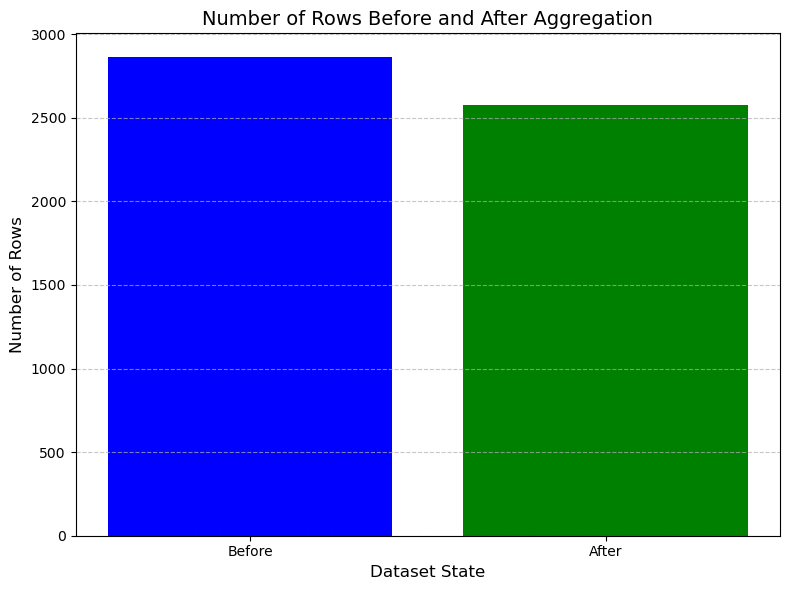

In [35]:
# Create a dynamic aggregation dictionary
agg_funcs = {col: 'last' for col in df_processed.columns}
agg_funcs['category'] = lambda x: ', '.join(set(x))  # Custom aggregation for 'category'

# Group and aggregate
df_processed = df_processed.groupby(['name','price', 'space'], as_index=False).agg(agg_funcs)

size_nduplicates = len(df_processed)

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Before', 'After'], [size_duplicates, size_nduplicates], color=['blue', 'green'])

# Add title and axis labels
plt.title('Number of Rows Before and After Aggregation', fontsize=14)
plt.xlabel('Dataset State', fontsize=12)
plt.ylabel('Number of Rows', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

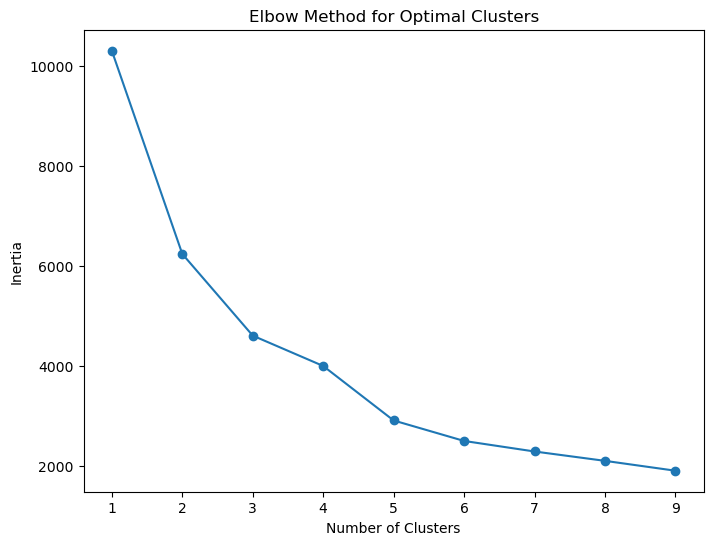

In [36]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


features = df_processed[['depth', 'height', 'width', 'space']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


The steep drop from 1 to 3 clusters suggests that splitting into 2-3 clusters greatly reduces the inertia. Therefore we go with 3 groups: small, medium and large objects.

In [37]:
optimal_clusters = 3 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=96)
df_processed['size_cluster'] = kmeans.fit_predict(scaled_features)


cluster_labels = {0: 'small', 1: 'medium', 2: 'large'}  
df_processed['size_category'] = df_processed['size_cluster'].map(cluster_labels)

print(df_processed[['depth', 'height', 'width', 'space', 'size_category', 'size_cluster']].tail())

          depth     height  width          space size_category  size_cluster
2569  40.437023  88.601142   25.0   89569.160935        medium             1
2570  40.437023  88.839720   25.0   89810.345687        medium             1
2571  49.274854  83.435062   78.0  320677.535425        medium             1
2572  40.643219  75.000000   78.0  237762.830859        medium             1
2573  49.274854  97.338410   78.0  374114.202558        medium             1


#### 4.2 Visualizing the model

The idea is that the user will first select what products he or she likes using a simple interactive screen to overcome the cold-start problem. Based on that we can introduce recommendations using K-NN.

The features we will consider for classification are:
- **category** (indirectly as one-hot-encoded rooms): categorical
- **price**: numerical
- **space**: categorical
- **designer** (indirectly): categorical


Reasons for not considering other potential similar features:
- **sellable_online**: Not indicative whether someone will find something a good recommendation or not. Just because someone bought a product online doesn't mean he/she won't consider buying a product in store in the future. Especially if it is to their liking.
- **other_colors**: It is entirely possible that someone will like the product a lot in the single color it comes in. It is not a good feature to include for recommendations.
- **short_description**: The variation in these descriptions is too high and the test is too short to determine an appropriate similarity, which is why we leave it out.

To address the high dimensionality, we will be adding a new feature that is based on hierarchical clustering. We will cluster products based on price and designer, and then have those clusters be the a new categorical feature **cluster**. This way we still incorporate designer into the equation. 

##### 4.2.1 Transforming data & dimensionality reduction

In [38]:
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

features = ['item_id','name','category', 'price', 'designer', 'Living room', 'Bedroom', 'Office', 'Kitchen', 'Dining room', 'Entrance', 'Playroom', 'Nursery', 'Outdoor', 'space']

df_model = df_processed[features].copy()
df_model = df_model.reset_index(drop=True)
#
# df_model = df_model.reset_index()

##### Creating a new feature based on hierarchical cluster

In [39]:
# Now we will create a new feature that is based on hierarchical cluster
# We calculate the average price for each designer
designer_prices = df_model.groupby('designer')['price'].mean().reset_index()
designer_prices.columns = ['designer', 'avg_price']

We standardize the data to make sure outliers don't affect the clustering process, resulting in possible sparse clusters.

In [40]:
scaler = StandardScaler()
designer_prices['std_avg_price'] = scaler.fit_transform(designer_prices[['avg_price']])

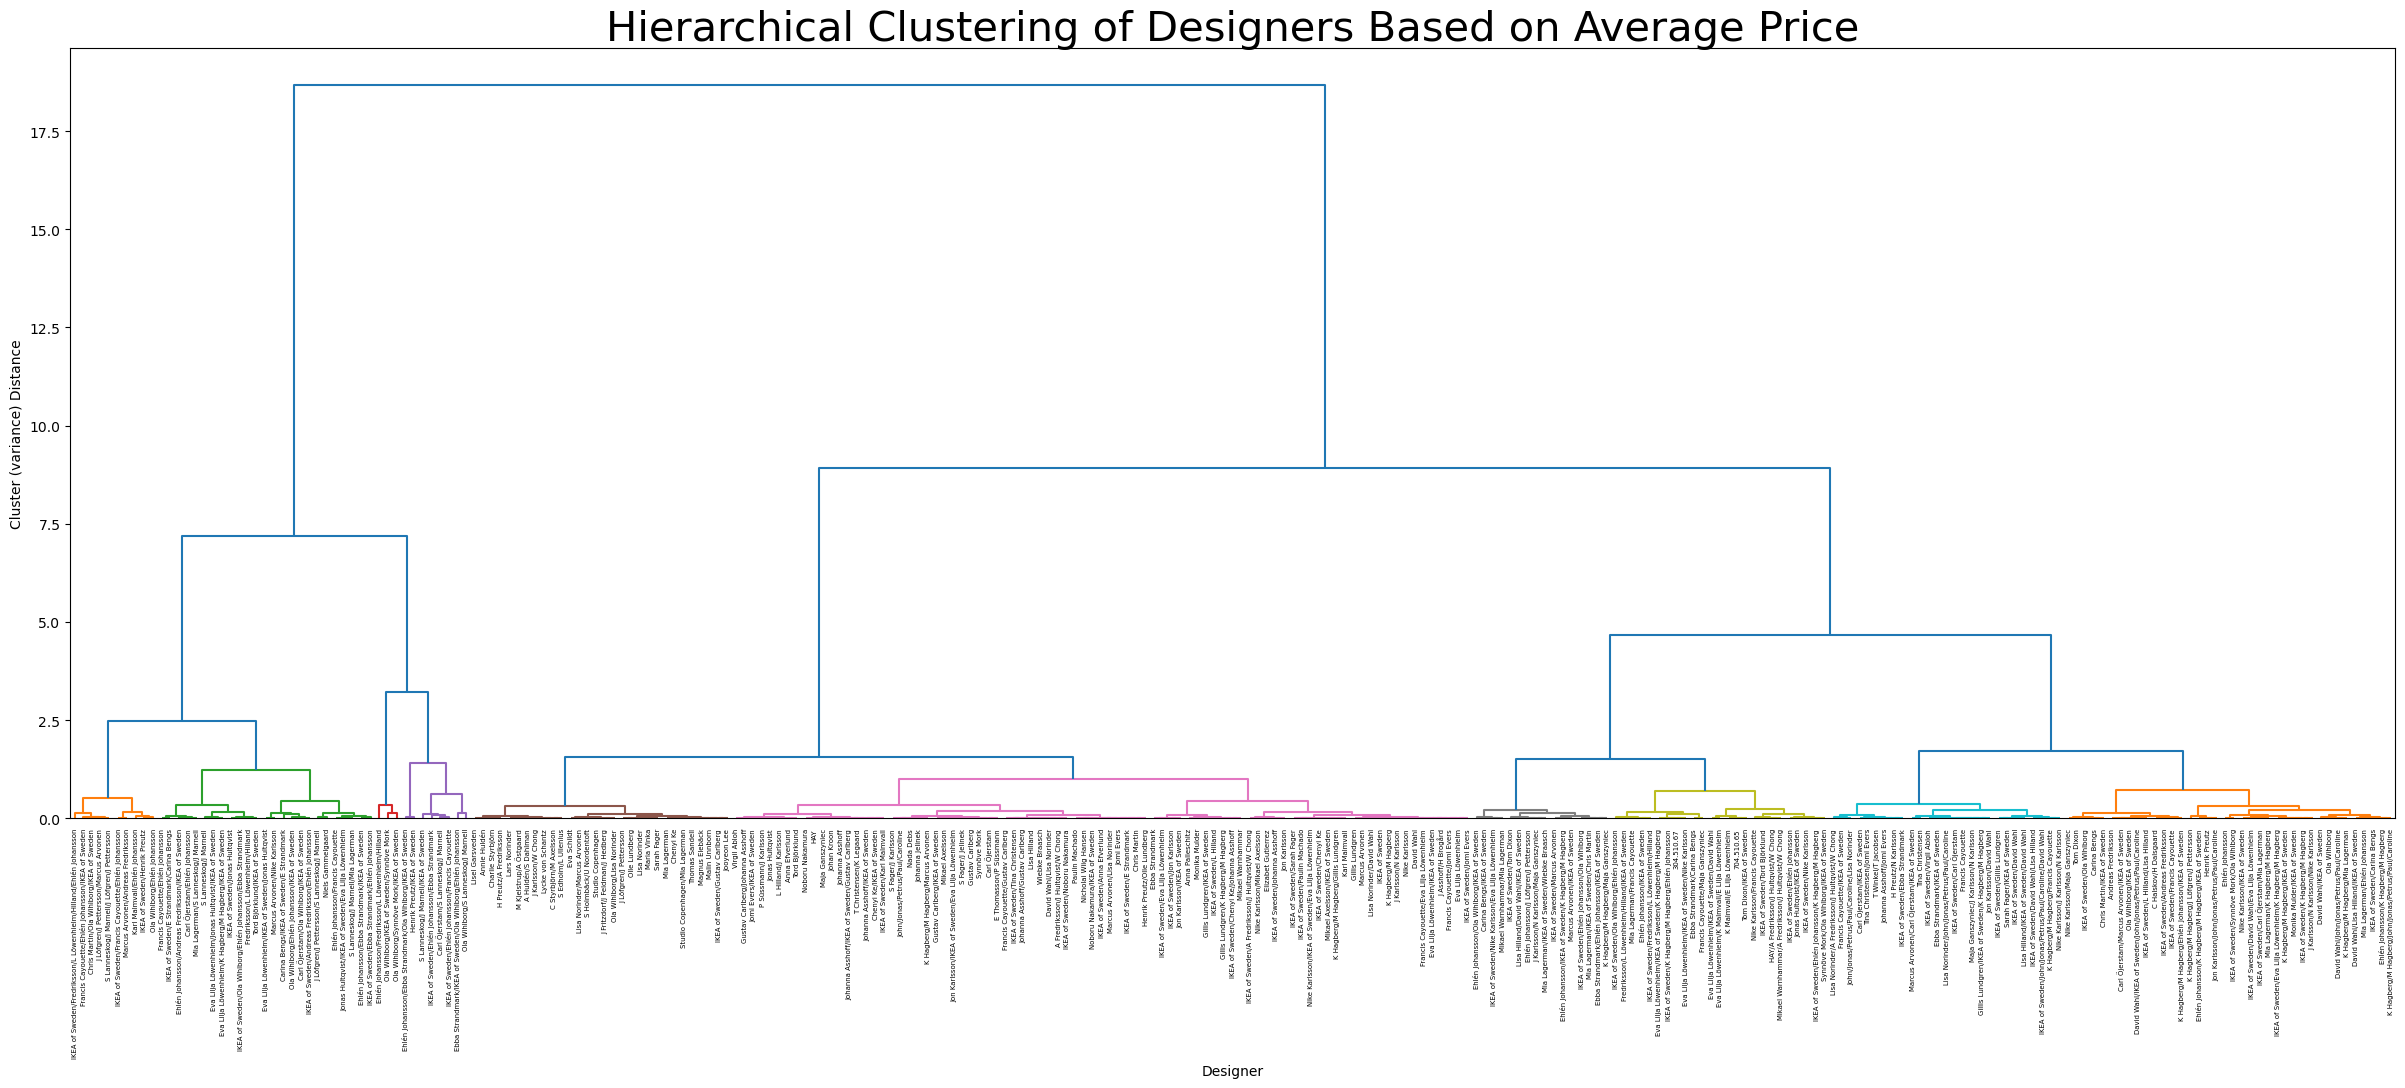

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical clustering
Z = linkage(designer_prices[['std_avg_price']], method='ward')  

# Specifying the threshold will determine where the clusters are made.
threshold = 1.5


plt.figure(figsize=(30, 10))
dendrogram(Z, labels=designer_prices['designer'].values,color_threshold=threshold)
plt.title("Hierarchical Clustering of Designers Based on Average Price",fontsize=30)
plt.xlabel("Designer")
plt.ylabel("Cluster (variance) Distance")
plt.show()

In [42]:
# we can set the threshold to determine the max distance to cut the dendogram
designer_prices['cluster'] = fcluster(Z, threshold, criterion='distance')

cluster_data = designer_prices.groupby('cluster')['avg_price'].agg(['min', 'max', 'std','var','count']).reset_index()

cluster_data['range'] = cluster_data['max'] - cluster_data['min']
cluster_data['designers'] = designer_prices.groupby('cluster')['designer'].apply(list).reset_index(drop=True)
cluster_data['avg_price_values'] = designer_prices.groupby('cluster')['avg_price'].apply(list).reset_index(drop=True)

print('Number of clusters:',len(cluster_data))

print(cluster_data)


Number of clusters: 10
   cluster          min     max         std            var  count  \
0        1  4265.000000  4785.0  206.224851   42528.689342     10   
1        2  3014.285714  4025.0  316.386952  100100.703637     25   
2        3  7988.000000  8551.0  285.895669   81736.333333      3   
3        4  5240.000000  6866.0  655.301613  429420.204365      8   
4        5    16.200000   251.5   73.100061    5343.618873     30   
5        6   275.000000   822.5  144.575400   20902.046203     85   
6        7  1947.500000  2185.0   76.302355    5822.049390     16   
7        8  2326.466667  2903.0  176.666230   31210.956803     25   
8        9   889.000000  1251.5   98.899849    9781.180206     27   
9       10  1311.166667  1875.0  155.816759   24278.862423     38   

         range                                          designers  \
0   520.000000  [Chris Martin/Ola Wihlborg/IKEA of Sweden, Fra...   
1  1010.714286  [Carina Bengs/IKEA of Sweden/E Strandmark, Car...   
2   563.00

The plot shows the hierarchical structure that we have created using ward clustering, which bases clusters on minimizing variance. By setting the threshold to 1.5 it means that the algorithm does not merge clusters if it results in an increase of variance >= 1.5 within that cluster.

Below we will show the average price within each cluster.

In [43]:
print(designer_prices.groupby(['cluster'])['avg_price'].mean())
print()
print('Counts per cluster')

cluster
1     4500.714286
2     3470.986429
3     8298.333333
4     5872.625000
5      137.848849
6      508.283743
7     2057.299306
8     2599.398396
9     1069.006123
10    1551.862321
Name: avg_price, dtype: float64

Counts per cluster


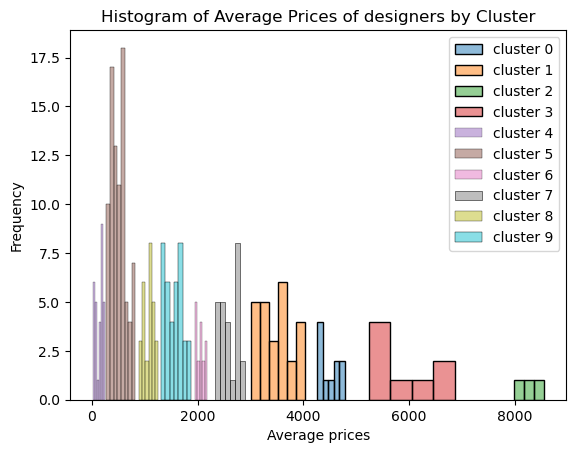

In [44]:
for i in range(len(cluster_data)):
    sns.histplot(cluster_data.loc[i, 'avg_price_values'], label=f'cluster {i}', kde=False, alpha=0.5)

# Add legend after the loop
plt.legend()

# Add labels
plt.xlabel('Average prices')
plt.ylabel('Frequency')
plt.title('Histogram of Average Prices of designers by Cluster')
plt.show()

For ease of use for summary information, we also include a column that has as string value all the rooms the product can be in.

In [45]:
# Define the list of room columns
room_columns = [
    'Living room', 'Bedroom', 'Office', 'Kitchen', 'Dining room',
    'Entrance', 'Playroom', 'Nursery', 'Outdoor'
]

# Combine the one-hot encoded room columns into a single column
df_model['rooms'] = df_model.apply(
    lambda row: ', '.join([room for room in room_columns if row[room] == 1]),
    axis=1
)

df_processed['rooms'] = df_model['rooms']

We are now done with preparing our data for training. Now lets say the user likes 20 items, and dislikes 20 other items. We delete the 20 items out of consideration that are disliked, and we add the 20 liked items to a basket. 

In [46]:
import random as r
r.seed(1)

n= 20
# items without replacement from df_model.index, 
disliked_idx = r.sample(list(df_model.index), k=n)

# remove disliked items
df_model = df_model.drop(disliked_idx,axis=0).reset_index(drop=True)

# sample without replacement again
liked_idx = r.sample(list(df_model.index), k=n)

# create basket of liked items
basket = df_model.loc[liked_idx,:]

And now we will add the cluster column to the products.

In [47]:
designer_grouped = designer_prices.groupby('designer')['cluster']

df_model['cluster'] = np.nan
for index,row in df_model.iterrows():
    df_model.loc[index,'cluster'] = designer_grouped.get_group(row['designer']).values

df_processed['cluster'] = df_model['cluster']
scaler = StandardScaler()

X_train = df_model.copy()

X_train.loc[:,['price_std', 'space_std']] = scaler.fit_transform(X_train.loc[:,['price', 'space']])

From here on we will use this cluster as a filter, which will help with our explainable recommendations.

In [48]:
# Initialize and train the k-NN classifier
model = NearestNeighbors(n_neighbors=51, metric='cosine')

to_remove = ['item_id','name','category','designer','price','space','rooms']

if all(col in X_train.columns for col in to_remove):
    X_train = pd.get_dummies(X_train, columns=['cluster']).copy()
    X_train = X_train.drop(columns=['item_id','name','category','designer','price','space','rooms'])


model.fit(X_train)

NearestNeighbors(metric='cosine', n_neighbors=51)

In [49]:

distances, similar_indices = model.kneighbors(X_train)
cosine_similarities = 1 - distances  

# drop the similarity of the instance itself
cosine_similarities = cosine_similarities[:,1:]
similar_indices = similar_indices[:,1:]
print(cosine_similarities)
print(cosine_similarities.shape)
print(similar_indices)
print(similar_indices.shape)

[[0.99999996 0.99999541 0.99996278 ... 0.99908877 0.99906637 0.99903049]
 [0.99995341 0.99992917 0.99991114 ... 0.87933794 0.87921036 0.87909412]
 [0.99986717 0.99986414 0.99973517 ... 0.99863432 0.99851396 0.99849051]
 ...
 [0.9998996  0.99989278 0.99986509 ... 0.99900524 0.99900504 0.9989955 ]
 [0.99998589 0.9999277  0.99992753 ... 0.99897517 0.99891915 0.99891012]
 [0.99982122 0.99980639 0.99961301 ... 0.94508943 0.94116432 0.93831773]]
(2554, 50)
[[ 545  800 1320 ... 2306 1634  490]
 [2181 2329 1949 ... 2080 2009 1318]
 [ 814 1492 1491 ...  147  921 1263]
 ...
 [ 988  691 2305 ... 1411 1582 1418]
 [ 366  967 1708 ... 2266 2490 1449]
 [1292 1290 1456 ... 2388  885 1352]]
(2554, 50)


Now lets say we have some new data, how does this look?

In [50]:
df_model['recommended'] = list(similar_indices)
df_model['cosine_sim'] = list(cosine_similarities)

# count the number of times the recommender system recommended the items
idx_counts = {}
idx_similarities = {}
idx_basket_sim = {}
for idx,row in basket.iterrows():
    for key,item in enumerate(similar_indices[idx]):
        if item not in list(basket.index):
            if item not in idx_counts:
                idx_counts[item] = 1
                idx_similarities[item] = [cosine_similarities[idx,key]]
                idx_basket_sim[item] = [idx]
            else:
                idx_counts[item] += 1
                idx_similarities[item].append(cosine_similarities[idx,key])
                idx_basket_sim[item].append(idx)

    recommended_idx = sorted(idx_counts, key=idx_counts.get, reverse=True)[:100]

# create dataframe with info about the recommendations
df_recommended = pd.DataFrame()
df_recommended['recommended_idx'] = recommended_idx
df_recommended['sim'] = df_recommended['recommended_idx'].apply(lambda x: idx_similarities[x])
df_recommended['avg_sim'] = df_recommended['recommended_idx'].apply(lambda x: np.mean(idx_similarities[x]))
df_recommended['count'] = df_recommended['recommended_idx'].apply(lambda x: idx_counts[x])
df_recommended['basket_sim'] = df_recommended['recommended_idx'].apply(lambda x: idx_basket_sim[x]) 
df_recommended_sorted = df_recommended.sort_values(by=['count', 'avg_sim'], ascending =[False,False])

In [51]:
rec_num = 5

# Extract the first `rec_num` values of the 'recommended_idx' column
recommended_items = df_model.loc[df_recommended_sorted['recommended_idx'].iloc[:rec_num],['name','category','price','cluster','space', 'designer']]

print('This was your basket of',n,'items')
print('---------------------------------------------')
print(df_model.loc[list(basket.index),['name','category','price','cluster']])

This was your basket of 20 items
---------------------------------------------
                   name                    category   price  cluster
2421              VIMLE           Sofas & armchairs  1290.0     10.0
418            DELAKTIG           Sofas & armchairs   125.0     10.0
1300           LAPPLAND        TV & media furniture   695.0      6.0
125              BEKANT              Tables & desks  2645.0      8.0
91               BEKANT              Tables & desks   700.0      8.0
104              BEKANT              Tables & desks  1100.0      6.0
2217             SVÄRTA                        Beds   875.0      6.0
37                ALGOT  Bookcases & shelving units   528.2      9.0
1561             MARKUS                      Chairs   795.0     10.0
887              HEMNES                        Beds   675.0     10.0
1728           NORSBORG           Sofas & armchairs  1280.0     10.0
118              BEKANT              Tables & desks  1769.0      8.0
2161    STUVA / FRITIDS 

Now some explainable recommendations

In [52]:
def plot_bar_chart(sim_names, sim_values, prod_name, prod_value, ylabel, title):
    """
    A function to plot a bar chart for a given set of names and values, with the first bar in red.
    """
    plt.figure()

    # Insert the recommended item as the first element
    sim_names = np.insert(sim_names.astype(str), 0, prod_name)
    sim_values = np.insert(sim_values, 0, prod_value)

    # Make names unique to handle duplicates
    unique_names = []
    name_counts = {}
    for name in sim_names:
        if name in name_counts:
            name_counts[name] += 1
            unique_names.append(f"{name} ({name_counts[name]})")
        else:
            name_counts[name] = 0
            unique_names.append(name)

    # Define colors: first bar red, the rest skyblue
    colors = ['red'] + ['skyblue'] * (len(unique_names) - 1)

    # Create the bar chart
    plt.bar(unique_names, sim_values, color=colors)

    # Add a legend
    plt.legend(
        handles=[
            plt.Line2D([0], [0], color='red', lw=4, label='Recommended Item'),
            plt.Line2D([0], [0], color='skyblue', lw=4, label='Your Items')
        ],
        loc='upper right'
    )

    # Add labels and title
    plt.xlabel('Item name')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Based on items you liked:
We recommend the following product as number 1:
                  name        category   price  cluster          space
999  INGATORP / INGOLF  Tables & desks  2615.0      8.0  424031.638641

As a result of liking 4 similar item(s):
                   name        category   price  cluster          space
125              BEKANT  Tables & desks  2645.0      8.0  340928.166159
91               BEKANT  Tables & desks   700.0      8.0  253232.970938
118              BEKANT  Tables & desks  1769.0      8.0  919544.437165
2264  TORSBY / VOLFGANG  Tables & desks  2395.0      9.0  392996.561274

------------------------------------------------------------------------------------
The product was designed by: Ebba Strandmark/Carina Bengs
------------------------------------------------------------------------------------
The recommended item is 90.65% similar to the items you liked.
------------------------------------------------------------------------------------
The r

<Figure size 640x480 with 0 Axes>

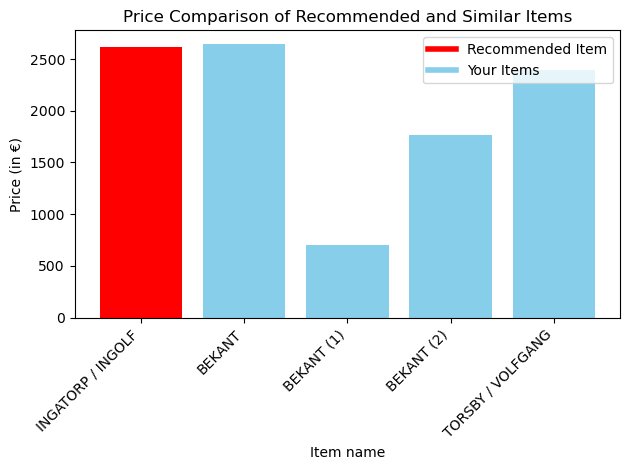

size 424031.6386405713


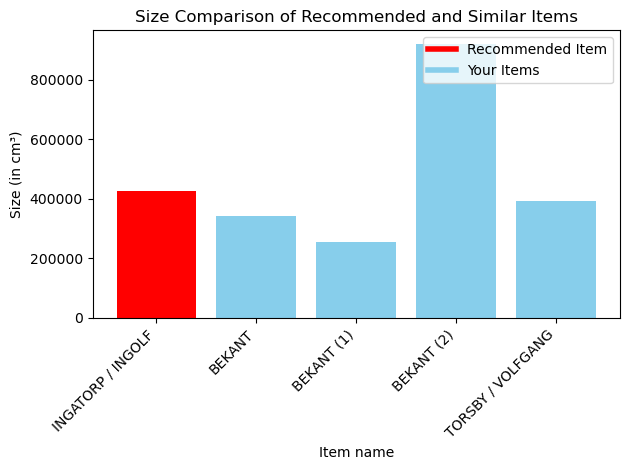

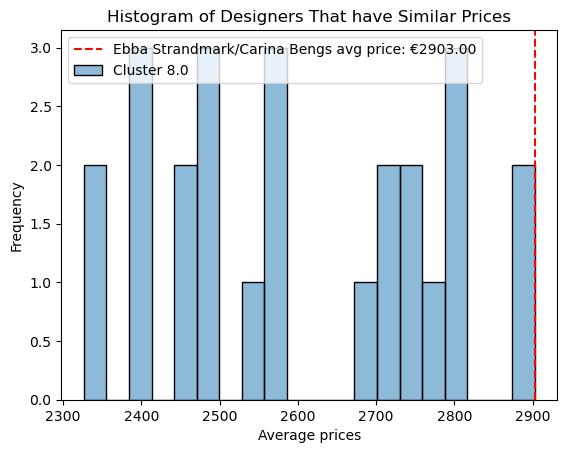

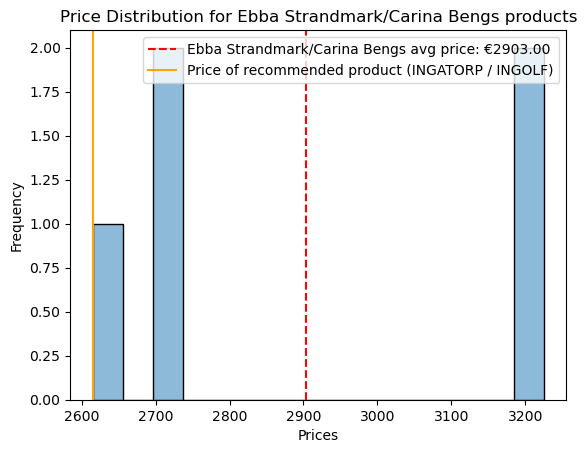



We recommend the following product as number 2:
                    name        category   price  cluster          space
994  INGATORP / INGATORP  Tables & desks  2725.0      8.0  431040.518409

As a result of liking 4 similar item(s):
                   name        category   price  cluster          space
125              BEKANT  Tables & desks  2645.0      8.0  340928.166159
91               BEKANT  Tables & desks   700.0      8.0  253232.970938
118              BEKANT  Tables & desks  1769.0      8.0  919544.437165
2264  TORSBY / VOLFGANG  Tables & desks  2395.0      9.0  392996.561274

------------------------------------------------------------------------------------
The product was designed by: Ebba Strandmark/Carina Bengs
------------------------------------------------------------------------------------
The recommended item is 90.09% similar to the items you liked.
------------------------------------------------------------------------------------
The recommended product c

<Figure size 640x480 with 0 Axes>

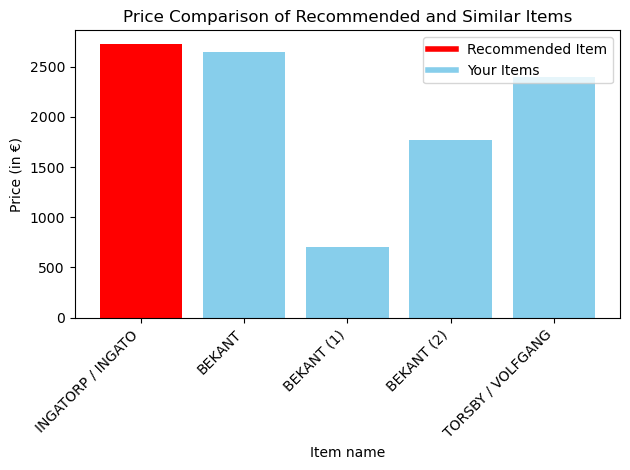

size 431040.51840857865


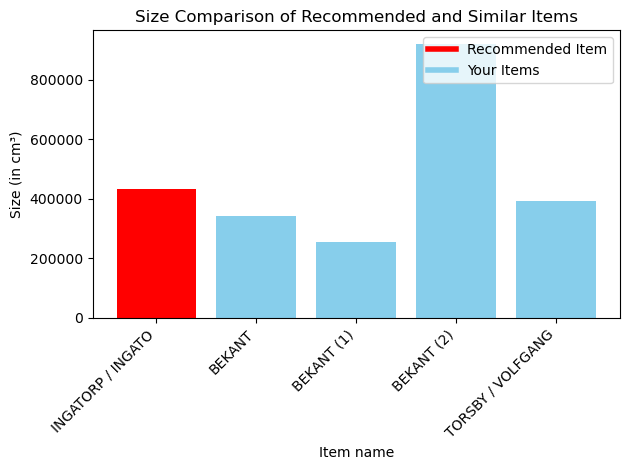

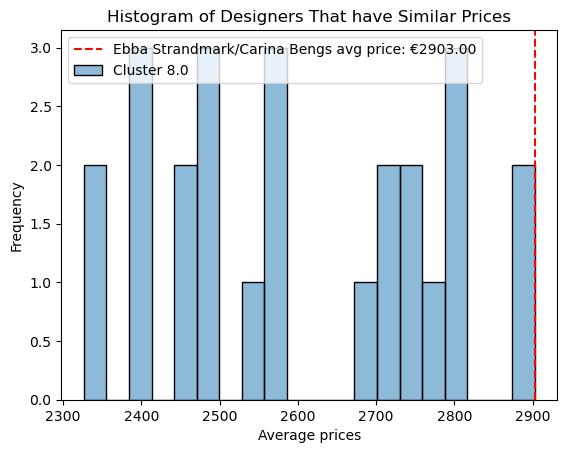

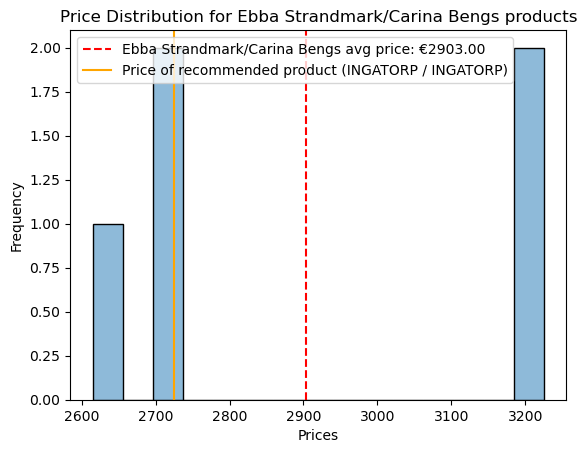



We recommend the following product as number 3:
                   name        category   price  cluster          space
1000  INGATORP / INGOLF  Tables & desks  2725.0      8.0  431040.518409

As a result of liking 4 similar item(s):
                   name        category   price  cluster          space
125              BEKANT  Tables & desks  2645.0      8.0  340928.166159
91               BEKANT  Tables & desks   700.0      8.0  253232.970938
118              BEKANT  Tables & desks  1769.0      8.0  919544.437165
2264  TORSBY / VOLFGANG  Tables & desks  2395.0      9.0  392996.561274

------------------------------------------------------------------------------------
The product was designed by: Ebba Strandmark/Carina Bengs
------------------------------------------------------------------------------------
The recommended item is 90.09% similar to the items you liked.
------------------------------------------------------------------------------------
The recommended product can

<Figure size 640x480 with 0 Axes>

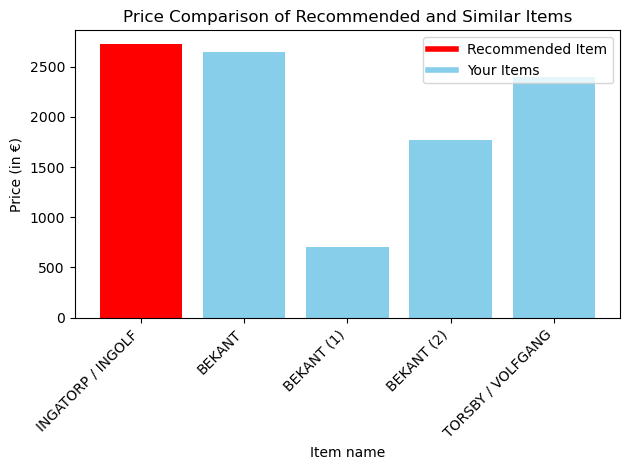

size 431040.51840857865


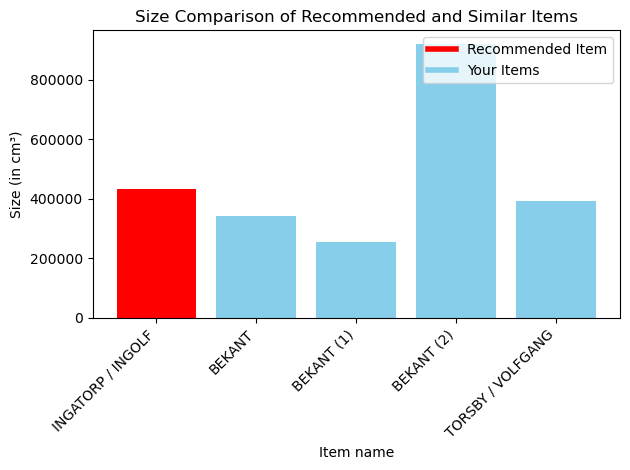

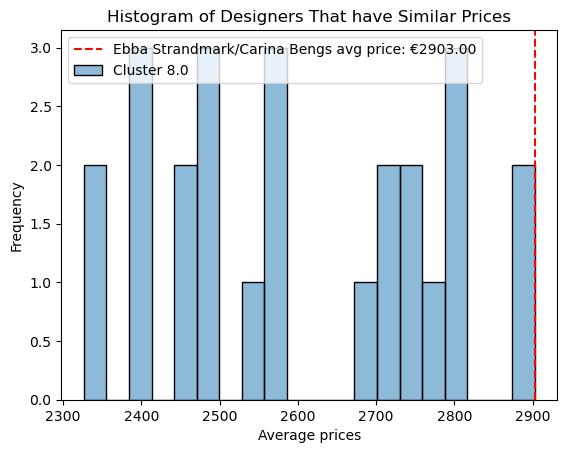

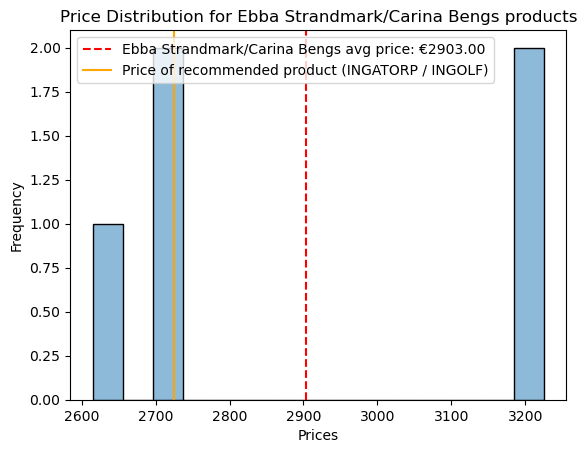



We recommend the following product as number 4:
       name        category   price  cluster          space
120  BEKANT  Tables & desks  1850.0      8.0  491550.011894

As a result of liking 3 similar item(s):
       name        category   price  cluster          space
125  BEKANT  Tables & desks  2645.0      8.0  340928.166159
91   BEKANT  Tables & desks   700.0      8.0  253232.970938
118  BEKANT  Tables & desks  1769.0      8.0  919544.437165

------------------------------------------------------------------------------------
The product was designed by: K Malmvall/E Lilja Löwenhielm
------------------------------------------------------------------------------------
The recommended item is 96.35% similar to the items you liked.
------------------------------------------------------------------------------------
The recommended product can be placed in the following rooms:
Living room, Office, Kitchen, Dining room
------------------------------------------------------------------

<Figure size 640x480 with 0 Axes>

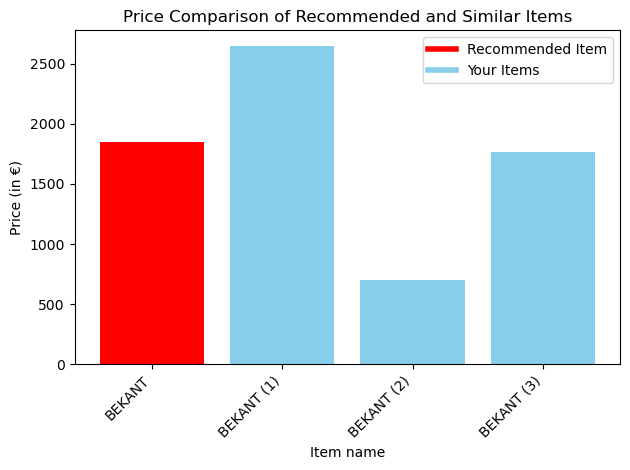

size 491550.0118939605


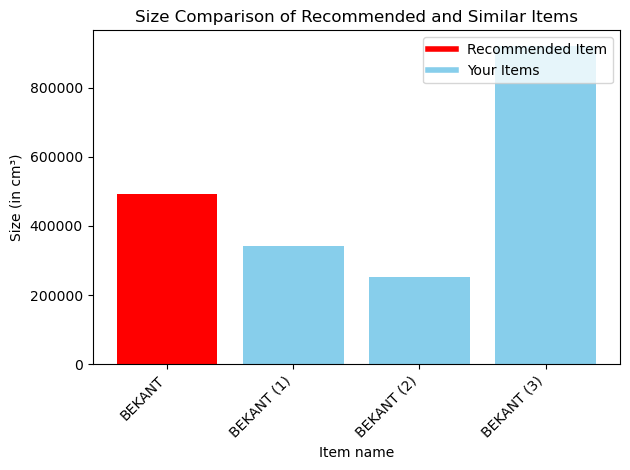

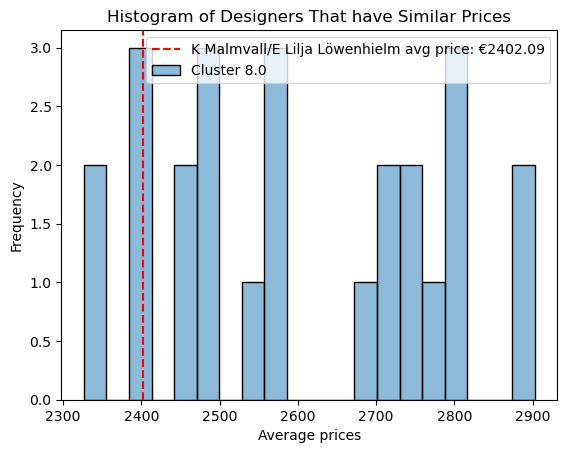

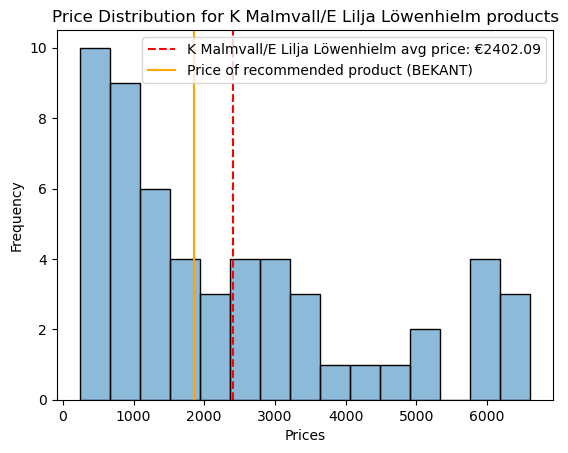



We recommend the following product as number 5:
            name category   price  cluster     space
1275  LANDSKRONA   Chairs  1395.0      8.0  617838.0

As a result of liking 3 similar item(s):
       name        category   price  cluster          space
125  BEKANT  Tables & desks  2645.0      8.0  340928.166159
91   BEKANT  Tables & desks   700.0      8.0  253232.970938
118  BEKANT  Tables & desks  1769.0      8.0  919544.437165

------------------------------------------------------------------------------------
The product was designed by: IKEA of Sweden/Tord Björklund
------------------------------------------------------------------------------------
The recommended item is 96.01% similar to the items you liked.
------------------------------------------------------------------------------------
The recommended product can be placed in the following rooms:
Living room, Office, Kitchen, Dining room
--------------------------------------------------------------------------------

<Figure size 640x480 with 0 Axes>

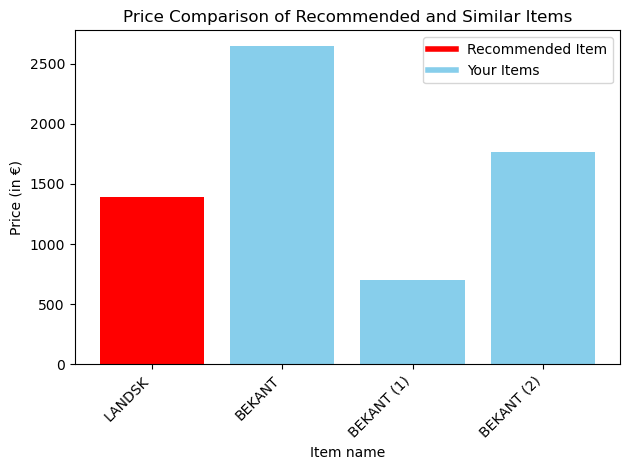

size 617838.0


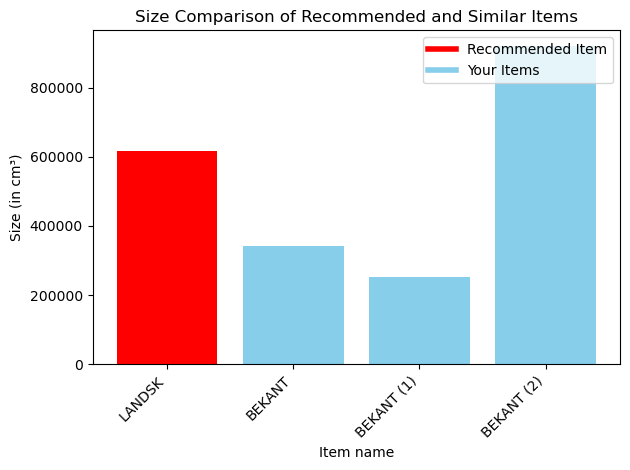

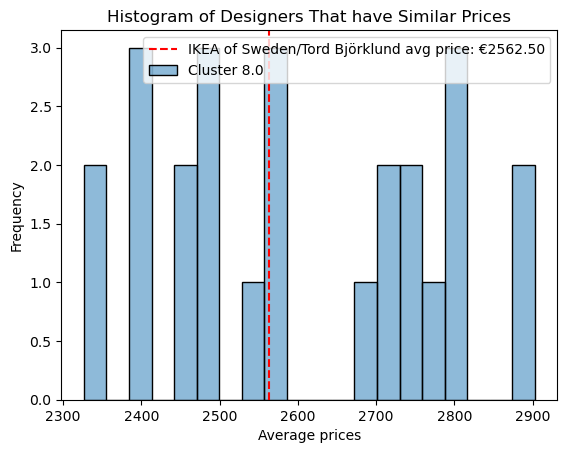

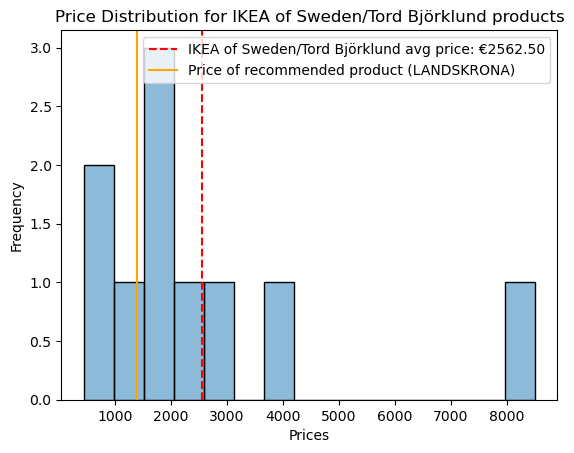

In [53]:
import math

print('Based on items you liked:')
iter = 0
for key,row in recommended_items.iterrows():    

    iter += 1

    show_features = ['name','category','price','cluster','space']
    print(f'We recommend the following product as number {iter}:')
    print(df_model.loc[[key],show_features])

    cluster = df_model.loc[key,'cluster']
    designer = df_model.loc[key,'designer']
    prod_name = df_model.loc[key,'name']
    prod_id = df_model.loc[key,'item_id']
    prod_price = df_model.loc[key,'price']
    prod_size = df_model.loc[key,'space']

    print()
    

    print('As a result of liking',idx_counts[key],'similar item(s):')
    print(df_model.loc[idx_basket_sim[key],show_features])

    sim_prices = df_model.loc[idx_basket_sim[key],'price'].values
    sim_sizes = df_model.loc[idx_basket_sim[key],'space'].values
    sim_names = df_model.loc[idx_basket_sim[key],'name'].values

    print()
    
    print('------------------------------------------------------------------------------------')
    print('The product was designed by: '+designer)
    print('------------------------------------------------------------------------------------')
    print('The recommended item is '+str(math.floor(np.mean(idx_similarities[key])*10000)/100)+'% similar to the items you liked.')
    print('------------------------------------------------------------------------------------')
    print('The recommended product can be placed in the following rooms:')
    print(df_model.loc[key,'rooms'])
    print('------------------------------------------------------------------------------------')



    des_price = designer_prices.loc[designer_prices['designer'] == designer,'avg_price'].values[0]

    plt.figure()

    plot_bar_chart(sim_names, sim_prices, prod_name, prod_price, 'Price (in €)', 'Price Comparison of Recommended and Similar Items')


    print('size', prod_size)
    # Plot size comparison
    plot_bar_chart(sim_names, sim_sizes, prod_name, prod_size, 'Size (in cm³)', 'Size Comparison of Recommended and Similar Items')

    plt.figure()

     # Specify the number of bins
    sns.histplot(
        cluster_data.loc[cluster-1, 'avg_price_values'],
        label=f'Cluster {cluster}',
        kde=False,
        alpha=0.5,
        bins=20  # Increased number of bins
    )

    # Add a vertical line for des_price
    plt.axvline(des_price, color='red', linestyle='--', label=f'{designer} avg price: €{des_price:.2f}')


    # Add labels
    plt.xlabel('Average prices')
    plt.ylabel('Frequency')
    plt.title('Histogram of Designers That have Similar Prices')

    # Add legend
    plt.legend()

    plt.show()


    des_distr = df_model.groupby('designer')['price'].get_group(designer).values

    plt.figure()
    sns.histplot(
        des_distr,
        kde=False,
        alpha=0.5,
        bins=15,  # Adjust bins if necessary
    )

    # Add a vertical line for des_price
    plt.axvline(des_price, color='red', linestyle='--', label=f'{designer} avg price: €{des_price:.2f}')
    plt.axvline(prod_price, color='orange', linestyle='-', label=f'Price of recommended product ({prod_name})')

    # Add labels
    plt.xlabel('Prices')
    plt.ylabel('Frequency')
    plt.title(f'Price Distribution for {designer} products')

    # Add legend
    plt.legend()
    plt.show()
    
    print('\n')
    

The recommended items are the top 20 items that the K-NN found similar most often and have the highest average similarity,

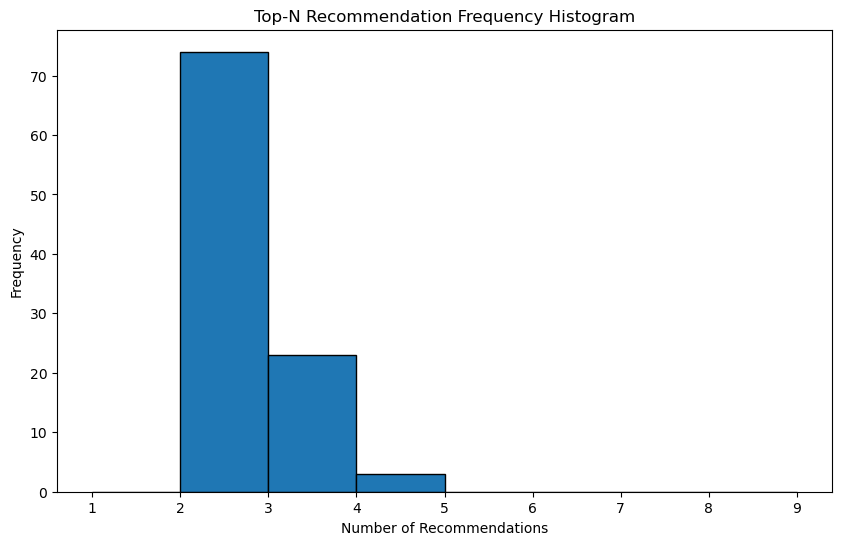

In [54]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_recommended_sorted['count'], bins=range(1, 10), edgecolor="k")
plt.title("Top-N Recommendation Frequency Histogram")
plt.xlabel("Number of Recommendations")
plt.ylabel("Frequency")
plt.show()

Now some summary statistics of our recommendations

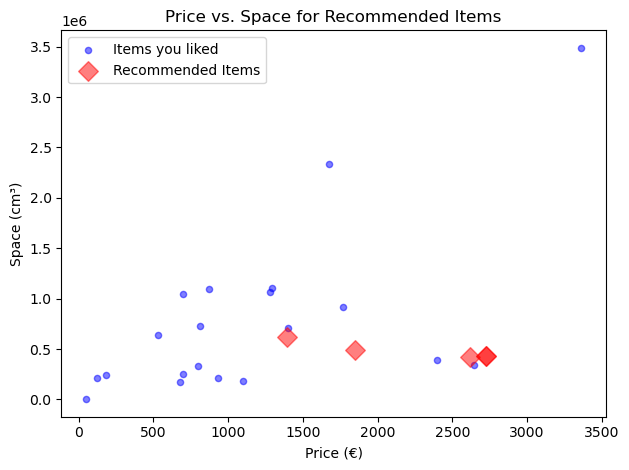

In [55]:
#summary_dim_price = df_model.loc[df_recommended_sorted.loc[:rec_num,'recommended_idx'], ['price', 'space']]
#summary_dim_price_other = basket.drop(index=df_recommended_sorted['recommended_idx'][:rec_num])

# Scatter plot for non-recommended items
plt.scatter(
    basket['price'], 
    basket['space'], 
    s=20, 
    marker="o", 
    color="blue", 
    alpha=0.5, 
    label="Items you liked"  # Label for the legend
)

# Scatter plot for recommended items
plt.scatter(
    recommended_items['price'], 
    recommended_items['space'], 
    s=100, 
    marker="D", 
    color="red", 
    alpha=0.5, 
    label="Recommended Items"  # Label for the legend
)

# Add basic labels, title, and legend
plt.xlabel("Price (€)")
plt.ylabel("Space (cm³)")
plt.title("Price vs. Space for Recommended Items")
plt.legend(loc="best")  # Automatically place legend in the best location

# Show the plot
plt.tight_layout()
plt.show()

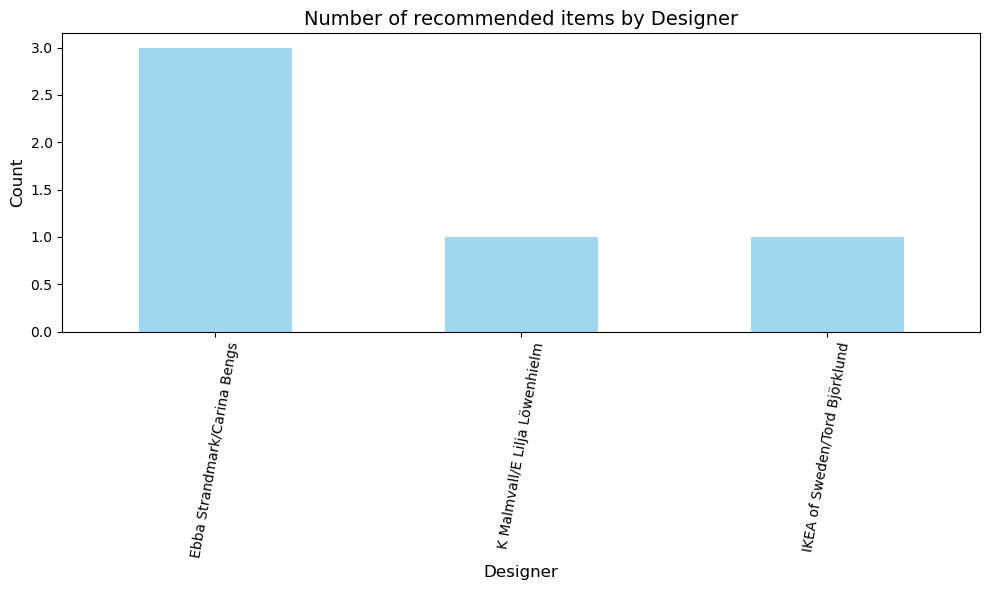

In [56]:
# Get value counts
designer_counts = recommended_items['designer'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
designer_counts.plot(kind='bar', color='skyblue', alpha=0.8)

# Add labels and title
plt.xlabel("Designer", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of recommended items by Designer", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=80)

# Show the plot
plt.tight_layout()
plt.show()

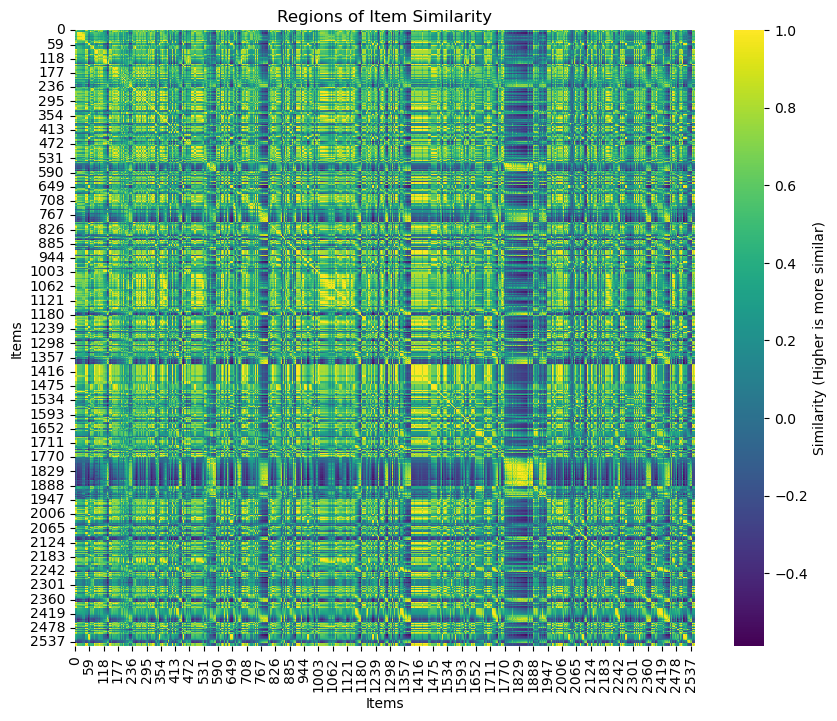

In [57]:

# Calculate similarity matrix
similarity_matrix = cosine_similarity(X_train)  # X is the catalog feature matrix

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='viridis', cbar_kws={'label': 'Similarity (Higher is more similar)'})
plt.title("Regions of Item Similarity")
plt.xlabel("Items")
plt.ylabel("Items")
plt.show()

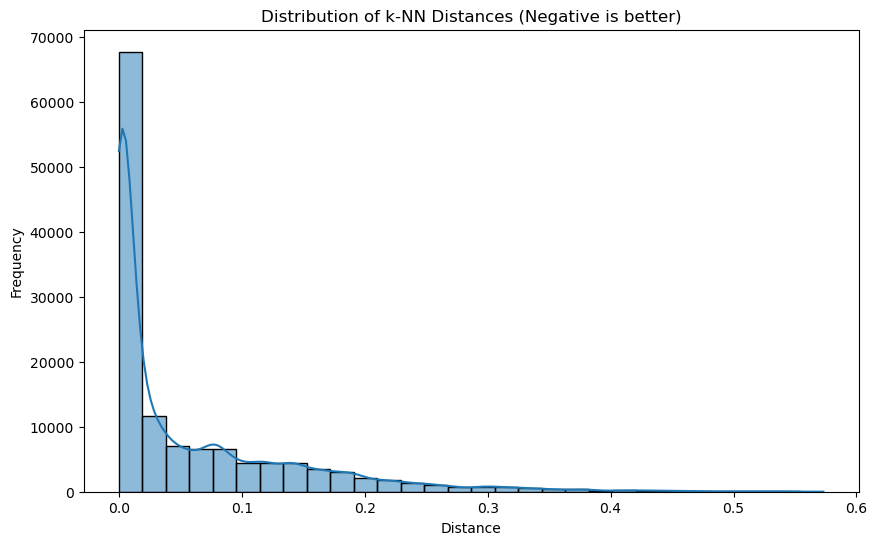

C:\Users\noahc\AppData\Local\Temp\ipykernel_13024\267200390.py:13: RuntimeWarning: divide by zero encountered in log10
  flattened_distances = np.log10(distances.flatten())


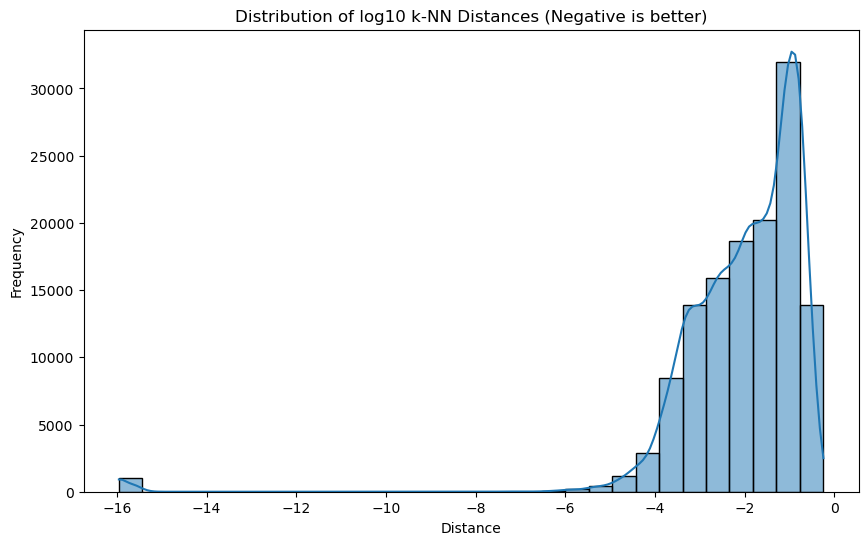

In [58]:

flattened_distances = distances.flatten()
#flattened_distances = distances.flatten()


# Plot distribution of distances
plt.figure(figsize=(10, 6))
sns.histplot(flattened_distances, kde=True, bins=30)
plt.title("Distribution of k-NN Distances (Negative is better)")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

flattened_distances = np.log10(distances.flatten())
#flattened_distances = distances.flatten()
# Plot distribution of distances
plt.figure(figsize=(10, 6))
sns.histplot(flattened_distances, kde=True, bins=30)
plt.title("Distribution of log10 k-NN Distances (Negative is better)")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

**Insights:**
- Reducing the dimensionality of the data set was very important. Without it the distances between the items would become quite meaningless, and therefore leading to bad recommendations. Although the similarities are still close, for our purposes it will suffice.
- The regions of similarity are related to the index, as can be seen on the heatmap. The similarity regions close to the diagonal are quite large, highlighting the similarity of items within the same category.
- We can see in the first histogram of distances that many items are close to zero. This has to do with the high dimensionality. When we investigate the distances on a log10 scale there is a clear distinction between similar items and items that are dissimilar, which supports our claim that we can make decent recommendations.
- Recommendations can only be evaluated using surveys.

### 5. Reflection
Our data preparation steps, including dimensionality reduction and feature engineering, significantly improved the dataset’s usability for modeling. Mapping `category` to `room` and the introduction of new features such as `size_cluster` simplified the dataset, addressing high cardinality and improving the interpretability of recommendations. Imputing missing values using regressions helped retain observations that otherwise would be lost. 

Clustering based on prices and designers was particularly effective in creating meaningful regions of similarity, validated through heatmaps and distance histograms. This reduced the 
impact of high-dimensionality challenges and improved the relevance of recommendations by grouping items into coherent clusters.

However, evaluating the effectiveness of recommendations remains a challenge, as it is difficult to evaluate whether the results actually satisfy users. Additionally, certain parameter choices in the model may appear arbitrary and could benefit from further refinement through systematic experimentation. 


